## 3.6 a
To prove that $\|.\|'$ is a norm we need to show following 3 conditions.

#### 1)
Showing $\|x\|' \ge 0$ is trivial

Since $\left\|\frac{x}{\|x\|}\right\|=1$, $\|x\|' \ge \left|\frac{x^*}{\|x\|}*x\right|$

$\implies \|x\|' \ge \|x\|$. Therefore, $\|x\|'=0$ only if $x=0$.

#### 2)
$\|x_1+x_2\|'$

$= sup_{\|y\| = 1} |y^*(x_1+x_2)|$

$= sup_{\|y\|=1}(|y^*x_1|+|y^*x_2|) $

$ \le sup_{\|y\|=1}|y^*x_1| + sup_{\|y\|=1}|y^*x_2| $

$= \|x_1\|' + \|x_2\|'$

#### 3)
$\|ax\|' $

$= sup_{\|y\|=1}|y^*(ax)| $

$= sup_{\|y\|=1}|a||y^*x| $

$=|a|\|x\|'$

## 4.5
To prove existance of real SVD, we will use mathematical induction.

Firstly we isolate the direction of largest action of A then proceed by induction on the dimesion of A.

Set $\sigma_1 = \|A\|_2$. By compactness argument, there exists $v_1 \in {\rm I\!R}^n$ and $u_1 \in {\rm I\!R}^m$ with $\|v_1\|_2 = \|u_1\|_2 = 1$ and $Av_1 = \sigma_1u1$. Let $\{v_j\}$ be any extension of $v_1$ to an orthonormal basis of ${\rm I\!R}^n$ and $\{u_j\}$ be any extension of $u_1$ to an orthonormal basis of ${\rm I\!R}^m$, and let $U_1$ and $V_1$ denote the unitary matrices with columns $u_j$ and $v_j$ respectively. Then,

$$U_1^TAV_1 = S = \begin{bmatrix}
    \sigma_1       & w^T\\
    0       & B\\
\end{bmatrix}$$

where $w^T$ is a row vector. Then B has dimensions $(m-1)*(n-1)$.

$$ \left\|\begin{bmatrix}
    \sigma_1       & w^T\\
    0       & B\\
\end{bmatrix} \begin{bmatrix}
    \sigma_1\\
    w\\
\end{bmatrix} \right\| \ge sigma_1^2 + w^Tw = (\sigma_1^2+w^Tw)^{1/2}\left\|\begin{bmatrix}
    \sigma_1\\
    w\\
\end{bmatrix}\right\|_2$$

This implies $\|S\|_2 = (\sigma_1^2 + w^Tw)^{1/2}$. Since $U_1$ and $V_1$ are real unitary, $\|S\|_2 = \|A\|_2 = \sigma_1$. Thus, $w=0$

If $n=1$ or $m=1$ then proof is done. Otherwise, the submatrix of $B$ describes the action of $A$ on the subspace orthogonal to $v_1$. By induction $B$ has a SVD $B=U_2\Sigma_2V_2^T$. Then,
$$A=U_1\begin{bmatrix}
    1       & 0\\
    0       & U_2\\
\end{bmatrix}\begin{bmatrix}
    \sigma_1       & 0\\
    0       & B\\
\end{bmatrix}\begin{bmatrix}
    1       & 0\\
    0       & V_2\\
\end{bmatrix}^TV_1^T$$
Since all $U_i$'s and $V_i$'s are real valued matrices, we have real valued SVD of $A$.

# 5.3 a

In [62]:
A = [-2 11;-10 5];
S = A.'*A;

%calculation of singular values
a = 1;
b = -(S(1,1)+S(2,2));
c = S(1,1)*S(2,2)-S(2,1)*S(1,2);
disc = b^2 - 4*a*c;
x1 = (-b+sqrt(disc))/(2*a);
x2 = (-b-sqrt(disc))/(2*a);

sigma1 = sqrt(x1);
sigma2 = sqrt(x2);

S = A*transpose(A);
u1 = null(S - (eye(2)*x1));
u2 = null(S - (eye(2)*x2));

S = transpose(A)*A;

% to determine the svd with minimum number of minus signs on U and V
% I added this minus to calculation of v1.
v1 = -null(S - (eye(2)*x1));
v2 = null(S - (eye(2)*x2));

if(abs(A*v1+sigma1*u1) < 1e-8)
    u1=-u1;
endif
if(abs(A*v2+sigma2*u2) < 1e-8)
    u2=-u2;
endif

sigma = [sigma1 0;0 sigma2]
U = [u1, u2]
V = [v1, v2]

U*sigma*V.'

sigma =

   14.14214    0.00000
    0.00000    7.07107

U =

   0.70711   0.70711
   0.70711  -0.70711

V =

  -0.60000   0.80000
   0.80000   0.60000

ans =

   -2.0000   11.0000
  -10.0000    5.0000



# 5.3 b

singular values: 14.142136 7.071068
left singular vectors:
u1 =

   0.70711
   0.70711

u2 =

   0.70711
  -0.70711

right singular vectors:
v1 =

  -0.60000
   0.80000

v2 =

   0.80000
   0.60000



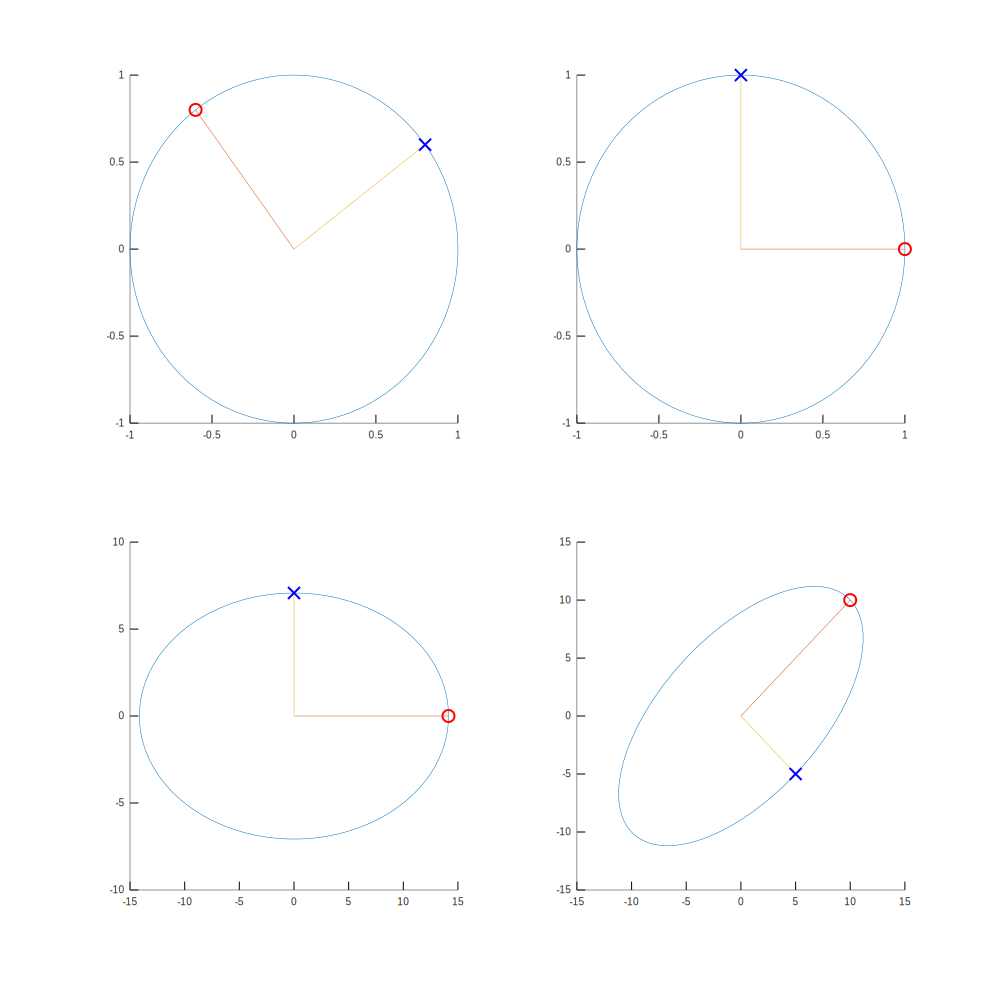

In [191]:
%disp('singular values', sigma(1,1),sigma(2,2))
printf('singular values: %f %f\n',sigma(1,1),sigma(2,2));
printf('left singular vectors:\n');
u1=U(:,1)
u2=U(:,2)
printf('right singular vectors:\n');
v1=V(:,1)
v2=V(:,2)

function x = plot_vector(v,style)
    plot([0, v(1,1)],[0,v(2,1)]);
    plot(v(1,1),v(2,1),style);
end

xwidth = 1000;
ywidth = 1000;
hFig = figure(1);
set(hFig, 'Position', [0 0 xwidth ywidth]);

%initial
subplot(2,2,1)
hold on
theta = linspace(0, 2*pi, 360);
hold on
T = [cos(theta);sin(theta)];
plot(T(1,:),T(2,:));
plot_vector(v1,'ro');
plot_vector(v2,'bx');

%V.'
subplot(2,2,2)
hold on
T = transpose(V)*T;
v1 = transpose(V)*v1;
v2 = transpose(V)*v2;
plot(T(1,:),T(2,:));
plot_vector(v1,'ro');
plot_vector(v2,'bx');

%SV.'
subplot(2,2,3)
hold on
T = sigma*T;
v1 = sigma*v1;
v2 = sigma*v2;
plot(T(1,:),T(2,:));
plot_vector(v1,'ro');
plot_vector(v2,'bx');

%USV.'
subplot(2,2,4)
hold on
T = U*T;
v1 = U*v1;
v2 = U*v2;
plot(T(1,:),T(2,:));
plot_vector(v1,'ro');
plot_vector(v2,'bx');

# 5.3 c

In [103]:
printf("1-norm of A:\t\t%d\n",max(sum(abs(A))));
printf("2-norm of A:\t\t%d\n",max(max(sigma)));
printf("inf-norm of A:\t\t%d\n",max(sum(abs(A.'))));
printf("frobenius norm of A:\t%f\n",sqrt(sum(sum(A.^2))));

1-norm of A:		16
2-norm of A:		14.1421
inf-norm of A:		15
frobenius norm of A:	15.811388


# 5.3 d

In [113]:
sigma_inv = [1/sigma(1,1),0;0,1/sigma(2,2)];
A_inv = V*sigma_inv*U.'

A_inv =

   0.050000  -0.110000
   0.100000  -0.020000



# 5.3 e

In [120]:
%calculation of eigenvalues
a = 1;
b = -(A(1,1)+A(2,2));
c = A(1,1)*A(2,2)-A(2,1)*A(1,2);
disc = b^2 - 4*a*c;
e1 = (-b+sqrt(disc))/(2*a);
e2 = (-b-sqrt(disc))/(2*a);
printf('eigenvalues are:\n');
e1
e2

eigenvalues are:
e1 =  1.5000 + 9.8869i
e2 =  1.5000 - 9.8869i


# 5.3 f

In [135]:
flag = abs(det(A)-e1*e2)<1e-10;
if (flag)
    disp('detA=eigen1*eigen2 is verified');
end
flag = abs(abs(det(A))-sigma(1,1)*sigma(2,2))<1e-10;
if (flag)
    disp('|detA|=sigma1*sigma2 is verified');
end

detA=eigen1*eigen2 is verified
|detA|=sigma1*sigma2 is verified


# 5.3 g

In [188]:
function n = norm(v)
    n = sqrt(sum(v.^2));
end

area = sigma(1,1)*sigma(2,2)*pi

area =  314.16
